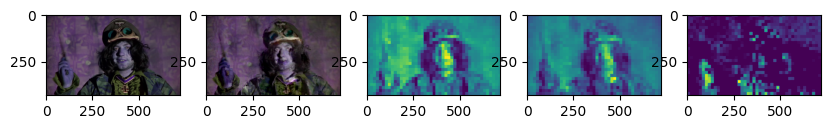

average mean: 3.7901234567901234, max mean: 47, min mean: 0


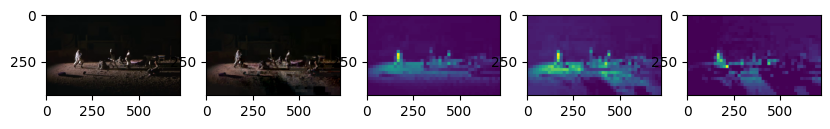

average mean: 3.562139917695473, max mean: 65, min mean: 0


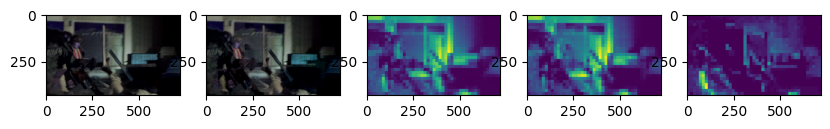

average mean: 4.042798353909465, max mean: 49, min mean: 0


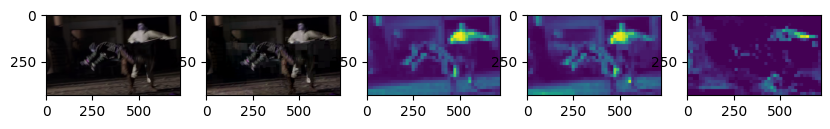

average mean: 2.022222222222222, max mean: 33, min mean: 0


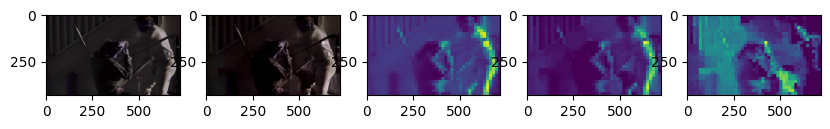

average mean: 9.981069958847737, max mean: 41, min mean: 0


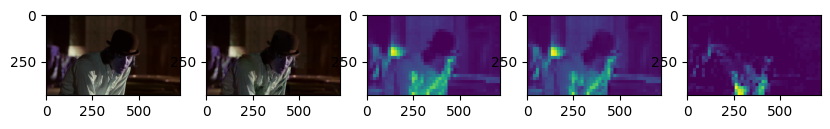

average mean: 3.0008230452674898, max mean: 74, min mean: 0


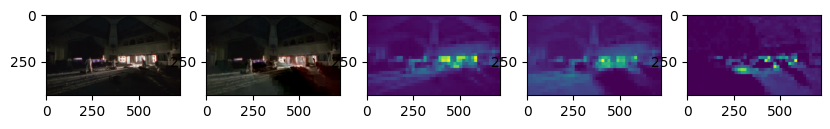

average mean: 4.678189300411523, max mean: 83, min mean: 0


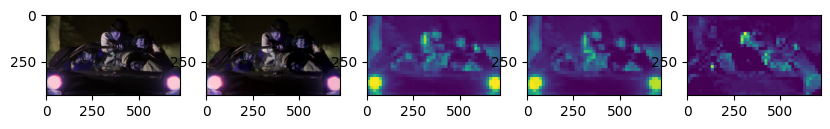

average mean: 4.618106995884774, max mean: 57, min mean: 0


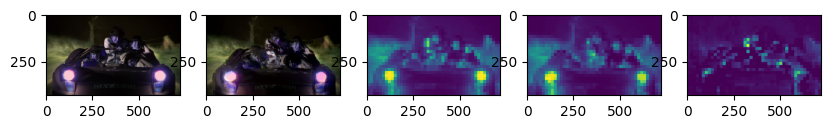

average mean: 5.871604938271605, max mean: 109, min mean: 0


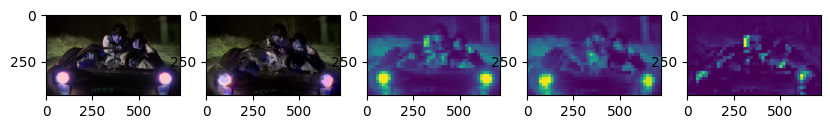

average mean: 7.213168724279836, max mean: 128, min mean: 0


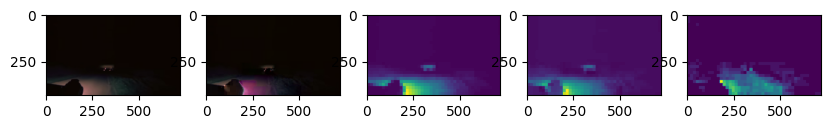

average mean: 1.0666666666666667, max mean: 20, min mean: 0


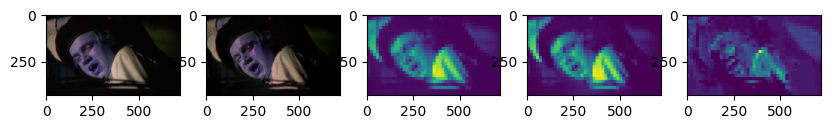

average mean: 5.091358024691358, max mean: 48, min mean: 0


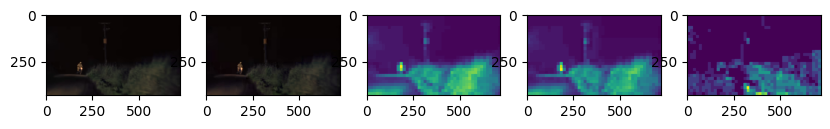

average mean: 1.042798353909465, max mean: 11, min mean: 0


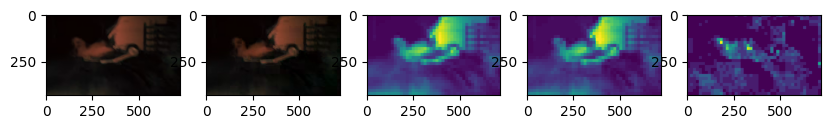

average mean: 1.0773662551440328, max mean: 13, min mean: 0


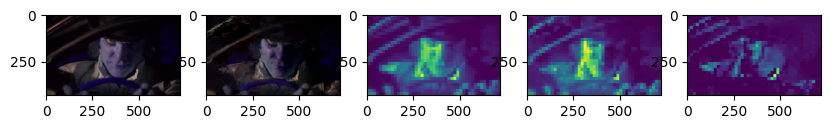

average mean: 5.158024691358024, max mean: 81, min mean: 0


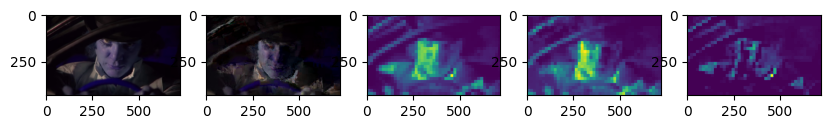

average mean: 5.700411522633745, max mean: 110, min mean: 0


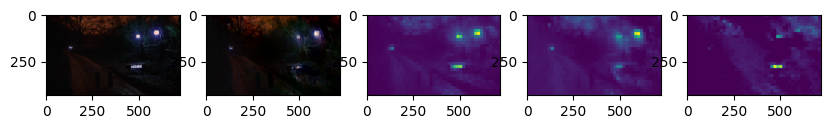

average mean: 3.302880658436214, max mean: 91, min mean: 0


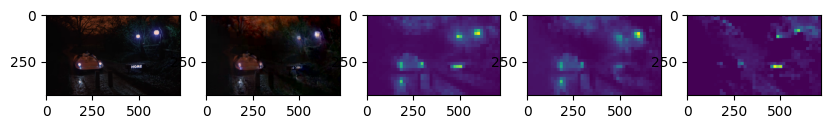

average mean: 3.4353909465020576, max mean: 94, min mean: 0


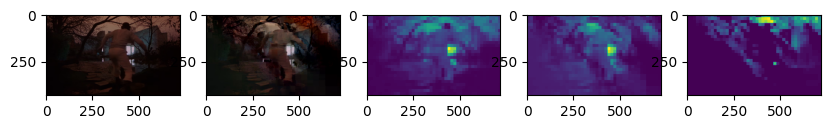

average mean: 4.837860082304527, max mean: 67, min mean: 0


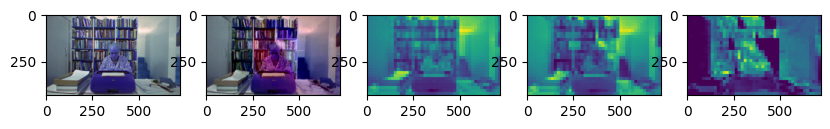

average mean: 22.160493827160494, max mean: 85, min mean: 0


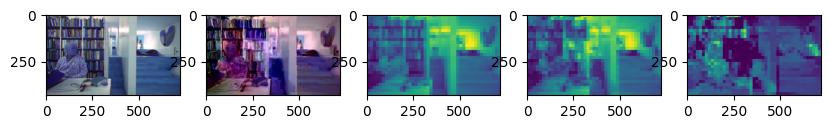

average mean: 24.31851851851852, max mean: 111, min mean: 0


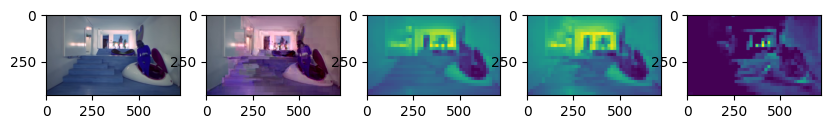

average mean: 7.911934156378601, max mean: 83, min mean: 0


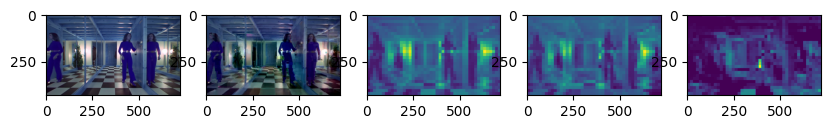

average mean: 13.087242798353909, max mean: 116, min mean: 0


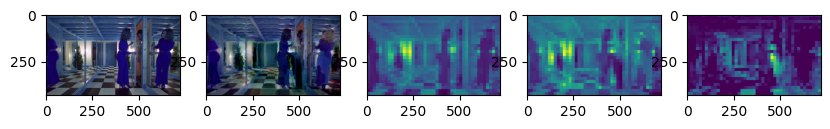

average mean: 12.490534979423868, max mean: 106, min mean: 0


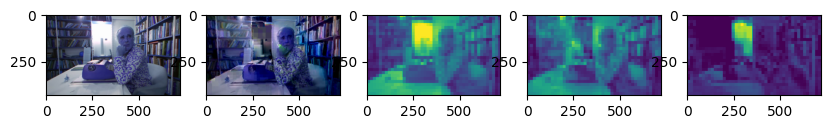

average mean: 26.848559670781892, max mean: 216, min mean: 0


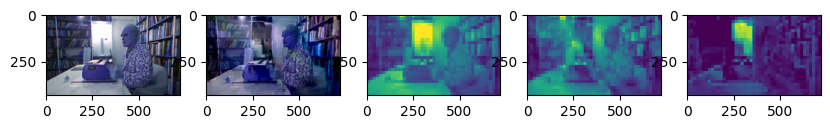

average mean: 27.05185185185185, max mean: 214, min mean: 0


[ WARN:0@350.264] global loadsave.cpp:241 findDecoder imread_('old_commit_frames/frame-7000.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [2]:
# frame_nums = [11,215,337,617,930,1151,1169,1504,1795,1775] #случайные кадры
frame_nums = list(range(500, 8501, 250))
src_f = 'old_commit_frames'
dest_f = 'last_commit_frames'
import imutils
import cv2
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


for frame in frame_nums:
    old, new = f"{src_f}/frame-{frame}.png", f"{dest_f}/frame-{frame}.png"
    i_old, i_new = cv2.imread(old), cv2.imread(new)
    gray_old, gray_new = cv2.cvtColor(i_old, cv2.COLOR_BGR2GRAY), cv2.cvtColor(i_new, cv2.COLOR_BGR2GRAY)
    # print(type(gray_old),gray_old.shape)
    #gray_... shape = [height, width]
    for row in range(0, gray_old.shape[0], 16):
        for col in range(0, gray_old.shape[1], 16):
            old_block = gray_old[row:row+16, col:col+16]
            new_block = gray_new[row:row+16, col:col+16]
            old_mean, new_mean = old_block.mean(), new_block.mean()
            gray_old[row:row+16, col:col+16] = old_mean
            gray_new[row:row+16, col:col+16] = new_mean


    # (_, diff) = compare_ssim(gray_old, gray_new, full=True)
    diff = cv2.subtract(gray_old, gray_new)
    # diff = (diff * 255).astype("uint8")
    # thresh = cv2.threshold(diff, 0, 255,
	#     cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    # cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    #     cv2.CHAIN_APPROX_SIMPLE)
    # cnts = imutils.grab_contours(cnts)
    # for c in cnts:
    #     # compute the bounding box of the contour and then draw the
    #     # bounding box on both input images to represent where the two
    #     # images differ
    #     (x, y, w, h) = cv2.boundingRect(c)
    #     cv2.rectangle(i_old, (x, y), (x + w, y + h), (0, 0, 255), 2)
    #     cv2.rectangle(i_new, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # show the output images
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(figsize=(10, 5), ncols=5)
    ax1.imshow(i_old, cmap='gray')
    ax2.imshow(i_new, cmap='gray')
    ax3.imshow(gray_old)
    ax4.imshow(gray_new)
    ax5.imshow(diff)
    # cv2.imshow("Thresh", thresh)
    plt.show()    
    print(f'average mean: {diff.mean()}, max mean: {diff.max()}, min mean: {diff.min()}')